This is an analysis of a dataset from Kickstarter, a crowdfunding platform. Analysis of this data shows that a lower pledge goal will lead to a higher chance of a successful campaign. https://drive.google.com/file/d/0By26wLpAqHfQaF9Jb19RUFVnNjA/view

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [35]:
kickstarter = pd.read_csv('DSI_kickstarterscrape_dataset.csv', engine = 'python')

In [36]:
kickstarter.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [37]:
kickstarter.tail()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00
45956,2147460119,Moments of Insight,http://www.kickstarter.com/projects/1743305220...,Art,Conceptual Art,"Bozeman, MT",successful,18000.0,18758.0,1.042111,53,"Thu, 04 Aug 2011 04:30:00 -0000",10,"$25,$25,$50,$100,$125,$250,$500,$1,250,$2,500,...",20,4,40.38


In [38]:
kickstarter.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [39]:
kickstarter['pledged'].mean()

4980.749678963979

### Histogram of Project Backers

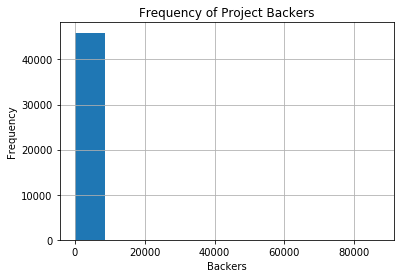

In [40]:
plt.hist(kickstarter['backers'])
plt.xlabel('Backers')
plt.title('Frequency of Project Backers')
plt.ylabel('Frequency')
plt.grid()
plt.show()

/Users/nhidiep/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


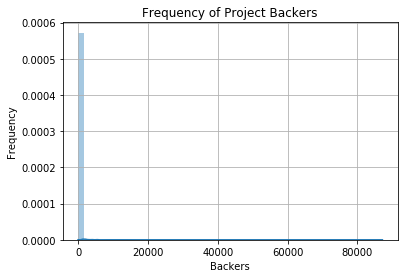

In [20]:
# Seaborn distribution plot
sns.distplot(kickstarter['backers'])
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Frequency of Project Backers')
plt.grid()
plt.show()

In [21]:
mu = kickstarter['duration'].mean()
sigma = kickstarter['duration'].std()
size = len(kickstarter['duration'])

In [22]:
size

45957

In [23]:
duration_normal_dist = np.random.normal(mu, sigma, size )

In [24]:
duration_normal_dist

array([22.07188918, 43.69258437, 43.62049788, ..., 58.25118513,
       37.78427493, 25.64186742])

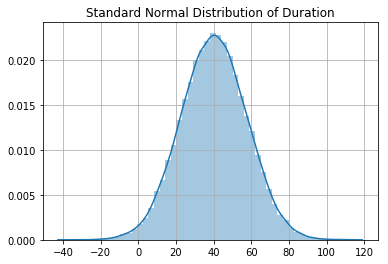

In [25]:
sns.distplot(duration_normal_dist)
plt.title('Standard Normal Distribution of Duration')
plt.grid()
plt.show()

In [26]:
actual_distribution = np.array(kickstarter['duration'])

In [27]:
stats.normaltest(actual_distribution)
#Not normally distributed since p-value is less than 0.05. P-value is significance level

NormaltestResult(statistic=6985.5754355009585, pvalue=0.0)

The duration variable is not normally distributed, since the P-value is less than the significance level of 0.05.

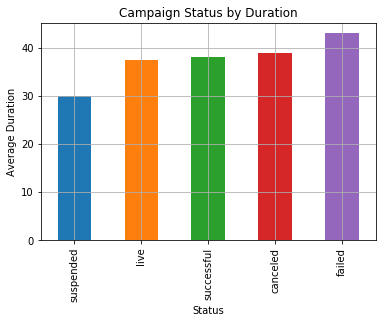

In [29]:
kickstarter.groupby("status")['duration'].mean().sort_values().plot(kind='bar')
plt.title("Campaign Status by Duration")
plt.xlabel("Status")
plt.ylabel("Average Duration")
plt.grid()
plt.show()

There seems to be no correlation between a campaign's success and its duration.

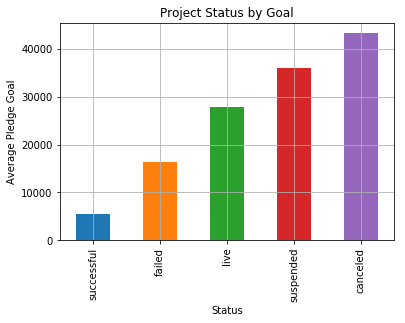

In [41]:
kickstarter.groupby("status")['goal'].mean().sort_values().plot(kind='bar')
plt.title("Project Status by Goal")
plt.xlabel("Status")
plt.ylabel("Average Pledge Goal")
plt.grid()
plt.show()

In [33]:
kickstarter.groupby('status').mean()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
status,,,,,,,,,
canceled,1.035202e+09,43295.372881,2019.779661,0.090707,39.966102,9.254237,1.898305,19.406780,38.943220
failed,1.081482e+09,16350.594937,897.338808,0.104861,12.569962,7.290061,1.496894,0.963361,42.977828
live,1.074217e+09,27894.687732,3485.967067,0.455055,59.013489,8.562993,1.418173,8.939679,37.499801
successful,1.081375e+09,5483.827983,8618.658496,3.536888,119.377814,8.496844,6.687144,14.386564,37.960475
suspended,1.676086e+09,36125.000000,14757.250000,0.593544,192.000000,11.750000,5.500000,21.000000,30.000000


Successful campaigns had a lower average pledge goal, than ones that failed, were suspended, or cancelled. Successful campaigns had an average pledge goal of $5484. 

In [19]:
kickstarter['category'].unique()

#Prints out all categories. Unique function is used so that duplicates aren't printed out. 

array(['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Technology',
       'Dance', 'Publishing', 'Theater', 'Comics', 'Design',
       'Photography', 'Food', 'Film &amp; Video'], dtype=object)

In [20]:
kickstarter['status'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [21]:
success= {'successful': True, 'failed': False, 'live': False, 'canceled': False, 'suspended': False}
kickstarter['success'] = kickstarter['status'].map(success)

In [22]:
kickstarter.head()
#View new column 'success'

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,success
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,True
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,False
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,False
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,True
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,False


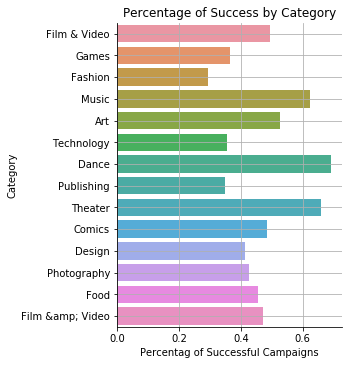

In [57]:
sns.catplot(x='success', y='category', data=kickstarter, kind='bar', ci=None)
plt.xlabel('Percentage of Successful Campaigns')
plt.ylabel('Category')
plt.title('Percentage of Success by Category')
plt.grid()
plt.show()

Music, dance, and theatre projects had the top 3 highest rates of successful campaigns, while fashion, technology, and publishing had the 3 lowest rates of successful campaigns.

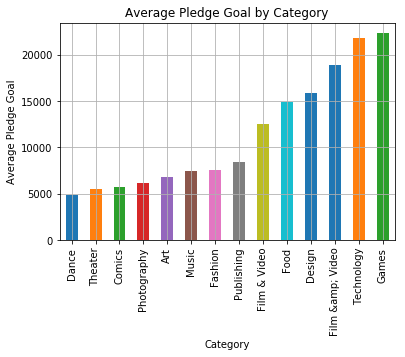

In [24]:
kickstarter.groupby("category")['goal'].mean().sort_values().plot(kind='bar')
plt.title("Average Pledge Goal by Category")
plt.xlabel("Category")
plt.ylabel("Average Pledge Goal")
plt.grid()
plt.show()

A reason that dance, theatre, and music had the highest percentage of successful campaigns could be that their pledge goals, on average, were lower. 

In [60]:
kickstarter.groupby(['category','success']).count()

project id  name   url  subcategory  location  \
category         success                                                  
Art              False          1886  1886  1886         1886      1826   
                 True           2106  2106  2106         2106      2053   
Comics           False           552   552   552          552       529   
                 True            520   520   520          520       507   
Dance            False           234   234   234          234       225   
                 True            527   527   527          527       520   
Design           False          1039  1039  1039         1039      1020   
                 True            729   729   729          729       720   
Fashion          False           801   801   801          801       788   
                 True            335   335   335          335       329   
Film & Video     False           252   252   252          252       243   
                 True            246   246   246          246       239   
Film &amp; Video False          6876  6876  6876         6876      6631   
                 True           6177  6177  6177         6177      5978   
Food             False           784   784   784          784       765   
                 True            655   655   655          655       646   
Games            False          1103  1103  1103         1103      1076   
                 True            635   635   635          635       615   
Music            False          4121  4121  4121         4121      4028   
                 True           6792  6792  6792         6792      6651   
Photography      False           869   869   869          869       830   
                 True            645   645   645          645       595   
Publishing       False          3099  3099  3099         3099      3003   
                 True           1671  1671  1671         1671      1587   
Technology       False           522   522   522          522       498   
                 True            289   289   289          289       277   
Theater          False           850   850   850          850       834   
                 True           1642  1642  1642         1642      1622   

                          status  goal  pledged  funded percentage  backers  \
category         success                                                      
Art              False      1886  1886     1886               1886     1886   
                 True       2106  2106     2106               2106     2106   
Comics           False       552   552      551                552      552   
                 True        520   520      520                520      520   
Dance            False       234   234      234                234      234   
                 True        527   527      527                527      527   
Design           False      1039  1039     1036               1039     1039   
                 True        729   729      729                729      729   
Fashion          False       801   801      801                801      801   
                 True        335   335      335                335      335   
Film & Video     False       252   252      252                252      252   
                 True        246   246      246                246      246   
Film &amp; Video False      6876  6876     6872               6876     6876   
                 True       6177  6177     6177               6177     6177   
Food             False       784   784      784                784      784   
                 True        655   655      655                655      655   
Games            False      1103  1103     1101               1103     1103   
                 True        635   635      635                635      635   
Music            False      4121  4121     4121               4121     4121   
                 True       6792  6792     6792               6792     6792   
Photography      False       869   86